In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

# loading data
twomoon = np.loadtxt('twomoons.dat')
tm_x = twomoon[:,1:]
tm_y = twomoon[:,0]
train_xy = np.loadtxt('dtrain123.dat')

# Experiment 1

#### kernel function and training function

In [72]:
def Gaussian(p,q,c):
    return (np.exp(-c*np.linalg.norm(p-q, axis = 1)**2))
    

def spectral_clustering(x,y,c):
    n = x.shape[0]

    # weight matrix
    W = np.zeros((n,n))
    for i in range(n):
        W[i,:] = Gaussian(x, x[i,:], c)
    # diagonal matrix
    D = np.diag(np.sum(W, axis = 1)) 
    # eigenvalues
    lambd,v = np.linalg.eigh(D - W)
    # second smallest
    v2= v[:, np.argsort(lam)[1]]   
    # cluster
    y_pred = np.sign(v2).astype(int) 
    # correct y_pre
    if y_pred != y:
        y_pred = - y_pred
    # accuracy
    correct = np.sum(y_pred==y)
    accuracy = np.absolute(correct)/len(y)
    
    ## experiment3 CP
    l_pos = np.sum(y_pred==y)
    CP = np.max(l_pos,(len(y)-l_pos))/len(y)
    
    return accuracy, y_pred, CP

#### visualise original data

Text(0.5, 1.0, 'Original data')

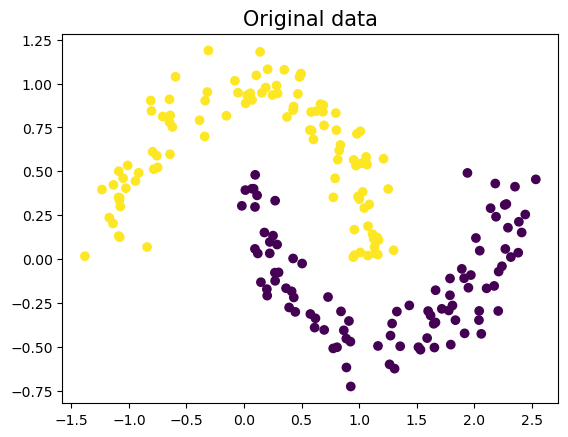

In [2]:
plt.scatter(tm_x[:,0], tm_x[:,1], c = tm_y)
plt.title('Original data', fontsize = 15)

Text(0, 0.5, 'accuracy')

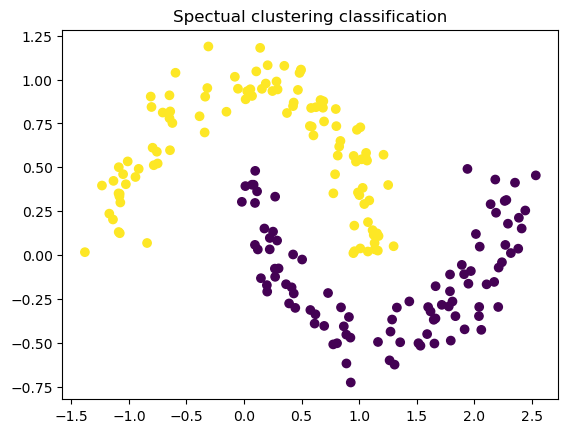

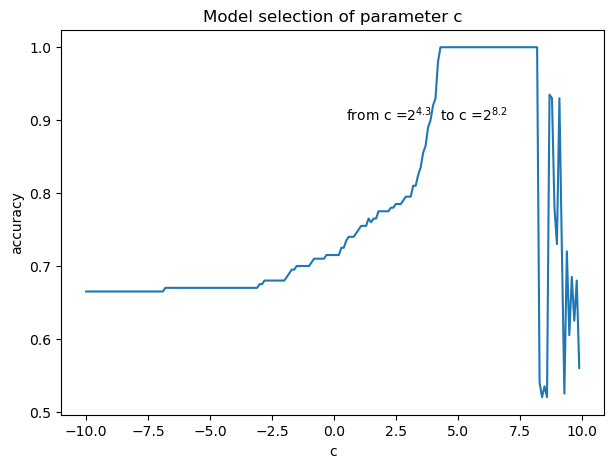

In [59]:
# cluster result with c = 60
_, y_predict,_ = spectral_clustering(moon_x,moon_y,60)
plt.scatter(moon_x[:,0], moon_x[:,1], c = y_predict)
plt.title('Spectual clustering classification')


# cluster result with c in range
degree = np.arange(-10,10,0.1)
acc = np.zeros_like(degree)

for i in range(len(moon_y)):
    
    # calculating accuracy for each parameter
    acc[i],_,_= spectral_clustering(moon_x, moon_y, 2**(degree[i]))

fig = plt.figure(figsize = (7,5))
plt.plot(degree, acc)
plt.annotate('from c =$ 2^{%.1f }$' % parameter_tm[np.argwhere(correctness_tm==1)[0]] +'  to c =$ 2^{%.1f }$' % parameter_tm[np.argwhere(correctness_tm==1)[-1]] , (0.5, 0.9))
plt.title('Model selection of parameter c')
plt.xlabel('c')
plt.ylabel('accuracy')


# Experiment 2

Text(0, 0.5, 'accuracy')

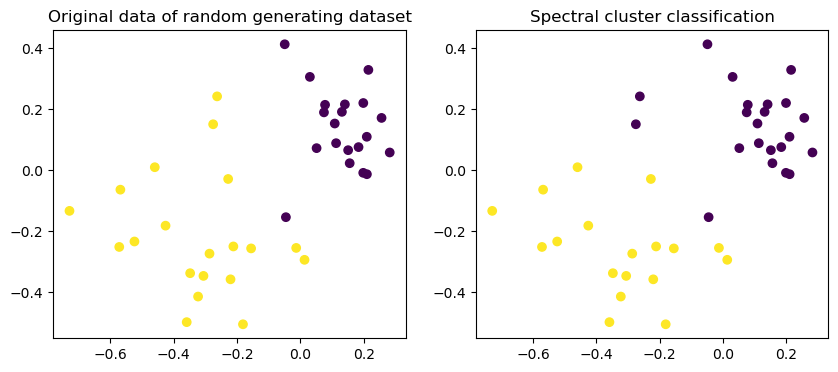

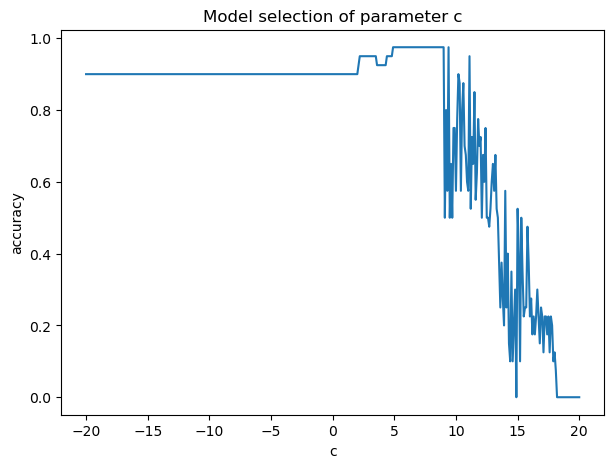

In [74]:
# generating data:
neg = np.random.multivariate_normal([-0.3,-0.3], np.diag([0.04,0.04]), size = 20)
pos = np.random.multivariate_normal([0.15,0.15], np.diag([0.01,0.01]), size = 20)
y_data = np.concatenate((np.ones(20),-np.ones(20)))
x_data = np.concatenate((pos,neg))
data = np.concatenate((x_data,y_data.reshape(-1,1)), axis =1)

# plot the original data
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1], c = data[:,2])
plt.title('Original data of random generating dataset')

# cluster 
_, y_predict2,_ = spectral_clustering(data[:,0:2], data[:,2], 5)

# plot the cluster data
plt.subplot(1,2,2)
plt.scatter(data[:,0], data[:,1], c = y_predict2)
plt.title('Spectral cluster data of random generating dataset')

# c and accuracy
degree2 = np.linspace(-10,10, 201)
acc2 = np.zeros_like(degree2)

for i in range(len(degree2)):
    acc2[i],_,_ = spectral_clustering(data[:,0:2], data[:,2], 2**(degree2[i]))

fig = plt.figure(figsize = (7,5))
plt.plot(degree2, acc2)
plt.title('Model selection of parameter c')
plt.xlabel('c')
plt.ylabel('accuracy')

# Experiment 3

0.01

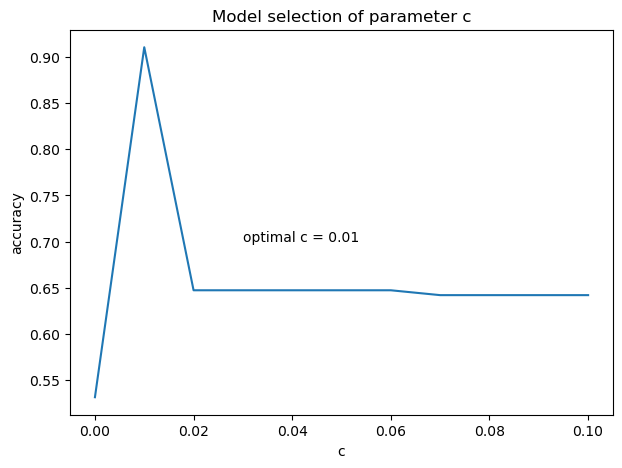

In [81]:
# loading 1,2,3 digits dataset
train = np.delete(train_xy, np.argwhere(train_xy[:,0]==2),axis=0)
x_train = train[:, 1:]
y_train = 2*(train[:, 0] == 1)-1


degreeT = np.linspace(0,0.1,11)
accT = np.zeros_like(degreeT)

# perform clustering
for i in range(len(degreeT)):
    _,_,accT[i] = spectral_clustering(x_train, y_train, degreeT[i])

# visualise
fig = plt.figure(figsize = (7,5))
plt.plot(degreeT, accT)
plt.annotate('optimal c = 0.01',  (0.03, 0.7))
plt.title('Model selection of parameter c')
plt.xlabel('c')
plt.ylabel('accuracy')
parameter_13[np.argmax(accT)]